# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas
- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [2]:
import pandas as pd

table = pd.read_csv('../data_bases/advertising.csv')
display(table)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

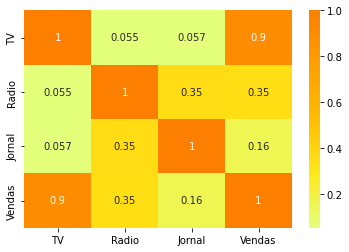

In [6]:
import matplotlib.pyplot as plt
import seaborn as sms

#  Cria o gráfico 
sms.heatmap(table.corr(), cmap='Wistia', annot=True)

# Exibe o gráfico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [55]:
y =  table['Vendas']
x = table[['TV', 'Radio', 'Jornal']]

from sklearn.model_selection import train_test_split

x_train, x_teste, y_train, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar os modelos
model_linear_regression = LinearRegression()
model_decision_tree = RandomForestRegressor()

# Treinar os modelos
model_linear_regression.fit(x_train, y_train)
model_decision_tree.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [57]:
# Fazer previsões
linear_regression_prevision = model_linear_regression.predict(x_teste)
decision_tree_prevision = model_decision_tree.predict(x_teste)

# Comparar previsiões
from sklearn import metrics

print(metrics.r2_score(y_test, linear_regression_prevision))
print(metrics.r2_score(y_test, decision_tree_prevision))

0.9071151423684273
0.9629519059603461


#### Visualização Gráfica das Previsões

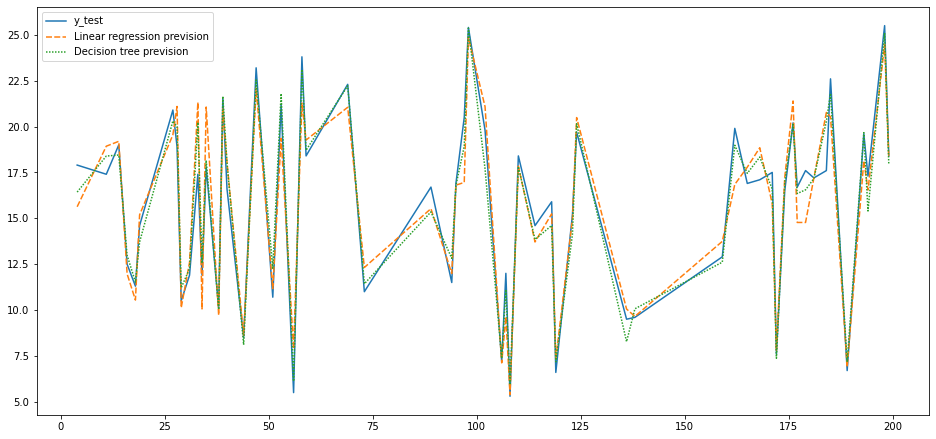

In [63]:
auxiliar_table = pd.DataFrame()
auxiliar_table['y_test'] = y_test
auxiliar_table['Linear regression prevision'] = linear_regression_prevision
auxiliar_table['Decision tree prevision'] = decision_tree_prevision

plt.figure(figsize=(16, 7.5))
sms.lineplot(data = auxiliar_table)
plt.show()

#### Como fazer uma nova previsão?

In [65]:
# Importando a tabela com as novas informações

new_table = pd.read_csv('../data_bases/novos.csv')
display(new_table)

prevision = model_decision_tree.predict(new_table)
print(prevision)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.615  8.725 20.005]
